In [1]:
import pandas as pd
import numpy as np
import os
import ast
import xarray as xr
import matplotlib.pyplot as plt

#### Investigate hourly dataset

In [2]:
df_msg_nans = pd.read_csv('./raw-summary-files/msg_2020_hourly_nans.csv')
df_goes_nans = pd.read_csv('./raw-summary-files/goes_2020_hourly_nans.csv')

#### Investigate MSG Files

##### Add additional metrics to csv file

In [3]:
msg_dict = {}
for i, wvl in enumerate(ast.literal_eval(df_msg_nans["wavelengths"][0])):
    # print(i, wvl)
    values = [ast.literal_eval(df_msg_nans['nans'][x])[i] for x in range(len(df_msg_nans))]
    msg_dict[wvl] = values

In [4]:
for key in msg_dict.keys():
    min = np.min(msg_dict[key])
    max = np.max(msg_dict[key])
    median = np.median(msg_dict[key])
    print(f'{key}: min: {min}, max: {max}, median: {median}')

1.64: min: 3565259, max: 4845128, median: 3565259.0
3.92: min: 3565259, max: 4811124, median: 3565259.0
8.7: min: 3565259, max: 5134701, median: 3565259.0
9.66: min: 3565259, max: 4868385, median: 3565259.0
10.8: min: 3565259, max: 5153245, median: 3565259.0
12.0: min: 3565259, max: 4621810, median: 3565259.0
13.4: min: 3565259, max: 4609146, median: 3565259.0
0.64: min: 3565259, max: 4707017, median: 3565259.0
0.81: min: 3565259, max: 4792019, median: 3565259.0
6.25: min: 3565259, max: 4998956, median: 3565259.0
7.35: min: 3565259, max: 4936928, median: 3565259.0


In [5]:
# Correct format of nan column
nans_corr = df_msg_nans['nans'].apply(lambda x: ast.literal_eval(x))
df_msg_nans['nans'] = nans_corr

In [6]:
# normalize by substracting the border nan counts
nans_norm = df_msg_nans['nans'].apply(lambda x: [i - 3565259 for i in x])
df_msg_nans['nans_norm'] = nans_norm

In [7]:
# check which rows have >0 nans
nans_sum = df_msg_nans['nans_norm'].apply(lambda x: np.sum(x))
df_msg_nans['nans_sum'] = nans_sum

In [8]:
# calculate the total percentage of nans
nans_perc = df_msg_nans['nans'].apply(lambda x: (np.sum(x) - (3565259*11))/(11*3712*3712)*100)
df_msg_nans['nans_perc'] = nans_perc

In [9]:
# calculate the standard deviation of the nans
nans_std = df_msg_nans['nans'].apply(lambda x: np.std(x))
df_msg_nans['nans_std'] = nans_std

In [10]:
df_msg_nans.head()

,datetime,wavelengths,nans,nans_norm,nans_sum,nans_perc,nans_std
0,20200101015744,"[1.64, 3.92, 8.7, 9.66, 10.8, 12.0, 13.4, 0.64...","[3565259, 3565259, 3565259, 3565259, 3565259, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0.0,0.0
1,20200101025743,"[1.64, 3.92, 8.7, 9.66, 10.8, 12.0, 13.4, 0.64...","[3565259, 3565259, 3565259, 3565259, 3565259, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0.0,0.0
2,20200101035743,"[1.64, 3.92, 8.7, 9.66, 10.8, 12.0, 13.4, 0.64...","[3565259, 3565259, 3565259, 3565259, 3565259, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0.0,0.0
3,20200101065743,"[1.64, 3.92, 8.7, 9.66, 10.8, 12.0, 13.4, 0.64...","[3565259, 3565259, 3565259, 3565259, 3565259, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0.0,0.0
4,20200101075744,"[1.64, 3.92, 8.7, 9.66, 10.8, 12.0, 13.4, 0.64...","[3565259, 3565259, 3565259, 3565259, 3565259, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0.0,0.0


In [162]:
df_msg_nans.to_csv('./raw-summary-files/msg_2020_hourly_nans.csv', index=False)
df_msg_nans.head()

,datetime,wavelengths,nans,nans_norm,nans_sum,nans_perc,nans_std
0,20200101015744,"[1.64, 3.92, 8.7, 9.66, 10.8, 12.0, 13.4, 0.64...","[3565259, 3565259, 3565259, 3565259, 3565259, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0.0,0.0
1,20200101025743,"[1.64, 3.92, 8.7, 9.66, 10.8, 12.0, 13.4, 0.64...","[3565259, 3565259, 3565259, 3565259, 3565259, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0.0,0.0
2,20200101035743,"[1.64, 3.92, 8.7, 9.66, 10.8, 12.0, 13.4, 0.64...","[3565259, 3565259, 3565259, 3565259, 3565259, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0.0,0.0
3,20200101065743,"[1.64, 3.92, 8.7, 9.66, 10.8, 12.0, 13.4, 0.64...","[3565259, 3565259, 3565259, 3565259, 3565259, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0.0,0.0
4,20200101075744,"[1.64, 3.92, 8.7, 9.66, 10.8, 12.0, 13.4, 0.64...","[3565259, 3565259, 3565259, 3565259, 3565259, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0.0,0.0


In [83]:
files_with_nans = df_msg_nans[df_msg_nans['nans_sum'] > 0]

In [45]:
np.nanmin(files_with_nans['nans_sum']), np.nanmax(files_with_nans['nans_sum'])

(np.int64(1), np.int64(14260610))

In [165]:
files_with_nans.loc[files_with_nans['nans_std'].idxmax()]

datetime                                          20201012115743
wavelengths    [1.64, 3.92, 8.7, 9.66, 10.8, 12.0, 13.4, 0.64...
nans           [4845128, 4811124, 5134701, 4868385, 5153245, ...
nans_norm      [1279869, 1245865, 1569442, 1303126, 1587986, ...
nans_sum                                                14260610
nans_perc                                               9.408697
nans_std                                           175036.813976
Name: 3377, dtype: object

In [100]:
files_with_many_nans = files_with_nans[files_with_nans['nans_perc'] > 0.003]
files_with_many_nans

,datetime,wavelengths,nans,nans_norm,nans_sum,nans_perc,nans_std
133,20200113185744,"[1.64, 3.92, 8.7, 9.66, 10.8, 12.0, 13.4, 0.64...","[3565684, 3565684, 3565684, 3565684, 3565684, ...","[425, 425, 425, 425, 425, 425, 425, 425, 425, ...",4675,0.003084,0.000000
136,20200114005744,"[1.64, 3.92, 8.7, 9.66, 10.8, 12.0, 13.4, 0.64...","[3571905, 3571905, 3571905, 3571905, 3571905, ...","[6646, 6646, 6646, 6646, 6646, 6646, 6646, 664...",73106,0.048233,0.000000
137,20200114015743,"[1.64, 3.92, 8.7, 9.66, 10.8, 12.0, 13.4, 0.64...","[3575454, 3575451, 3575449, 3575449, 3575449, ...","[10195, 10192, 10190, 10190, 10190, 10190, 101...",112097,0.073958,1.493789
138,20200114025743,"[1.64, 3.92, 8.7, 9.66, 10.8, 12.0, 13.4, 0.64...","[3577163, 3577163, 3577163, 3577163, 3577163, ...","[11904, 11904, 11904, 11904, 11904, 11904, 119...",130944,0.086393,0.000000
141,20200114145743,"[1.64, 3.92, 8.7, 9.66, 10.8, 12.0, 13.4, 0.64...","[3577934, 3577935, 3577934, 3577934, 3577934, ...","[12675, 12676, 12675, 12675, 12675, 12675, 126...",139447,0.092003,5.134553
...,...,...,...,...,...,...,...
300,20200127035742,"[1.64, 3.92, 8.7, 9.66, 10.8, 12.0, 13.4, 0.64...","[3576118, 3576118, 3576118, 3576118, 3576118, ...","[10859, 10859, 10859, 10859, 10859, 10859, 108...",119449,0.078809,0.000000
301,20200127045743,"[1.64, 3.92, 8.7, 9.66, 10.8, 12.0, 13.4, 0.64...","[3571871, 3571871, 3571871, 3571871, 3571871, ...","[6612, 6612, 6612, 6612, 6612, 6612, 6612, 661...",72732,0.047986,0.000000
302,20200127055743,"[1.64, 3.92, 8.7, 9.66, 10.8, 12.0, 13.4, 0.64...","[3567399, 3567390, 3567390, 3567390, 3567390, ...","[2140, 2131, 2131, 2131, 2131, 2131, 2131, 213...",23459,0.015478,3.082877
3377,20201012115743,"[1.64, 3.92, 8.7, 9.66, 10.8, 12.0, 13.4, 0.64...","[4845128, 4811124, 5134701, 4868385, 5153245, ...","[1279869, 1245865, 1569442, 1303126, 1587986, ...",14260610,9.408697,175036.813976


In [108]:
files_with_many_nans = files_with_nans[files_with_nans['nans_std'] > 1000]
files_with_many_nans

,datetime,wavelengths,nans,nans_norm,nans_sum,nans_perc,nans_std
169,20200116095744,"[1.64, 3.92, 8.7, 9.66, 10.8, 12.0, 13.4, 0.64...","[3565679, 3575700, 3576316, 3574606, 3565671, ...","[420, 10441, 11057, 9347, 412, 412, 412, 10649...",44386,0.029284,4806.554794
3377,20201012115743,"[1.64, 3.92, 8.7, 9.66, 10.8, 12.0, 13.4, 0.64...","[4845128, 4811124, 5134701, 4868385, 5153245, ...","[1279869, 1245865, 1569442, 1303126, 1587986, ...",14260610,9.408697,175036.813976
3918,20201126095743,"[1.64, 3.92, 8.7, 9.66, 10.8, 12.0, 13.4, 0.64...","[3565259, 3565260, 3565259, 3565259, 3575637, ...","[0, 1, 0, 0, 10378, 10376, 10397, 1, 1, 0, 0]",31154,0.020554,4624.323829


In [156]:
files_with_many_nans = files_with_nans[files_with_nans['nans_perc'] > 0.1]
files_with_many_nans

,datetime,wavelengths,nans,nans_norm,nans_sum,nans_perc
3377,20201012115743,"[1.64, 3.92, 8.7, 9.66, 10.8, 12.0, 13.4, 0.64...","[4845128, 4811124, 5134701, 4868385, 5153245, ...","[1279869, 1245865, 1569442, 1303126, 1587986, ...",14260610,9.408697


Conclusion 1: Most files are fine, even with an additional nan count on the order of [100s, 1000s, 10000s, 100000s]. There is only one file that is contains a large band of missing data (20201012115743). This is likely also one of the files that caused the training to crash, and will therefore be removed from the disk.

Conclusion 2: There are some files with a line of pixels missing (20200116095744, 20201126095743), and maybe a couple of other files with smaller artifacts. I am removing all files with nan std > 1000.

##### Visualize files with nans

In [96]:
path = '/mnt/disks/eo-data/msg'
file = '20200316195743_msg.nc'

ds = xr.open_dataset(os.path.join(path, file))
base_ds = xr.open_dataset(os.path.join(path, '20200105175744_msg.nc'))

c, h, w = ds.Rad.shape

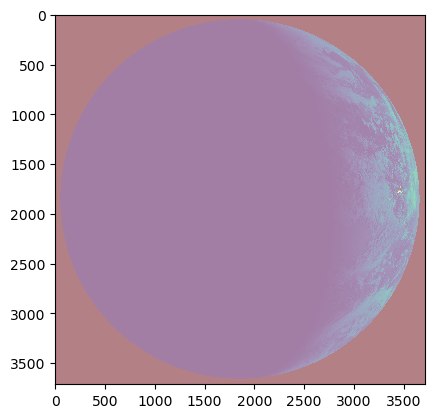

In [98]:
n = 7
# plot areas with nans
plt.imshow(np.isnan(ds.Rad.values[n]), cmap='Reds', interpolation='none', alpha=0.5)
plt.imshow(ds.Rad.values[n], interpolation='none', alpha=0.5)
# plt.imshow(np.isnan(base_ds.Rad.values[0]), cmap='Reds', interpolation='none', alpha=0.5)

#### Investigate GOES Files

##### Add additional metrics to csv file

In [11]:
goes_dict = {}
for i, wvl in enumerate(ast.literal_eval(df_goes_nans["wavelengths"][0])):
    # print(i, wvl)
    values = [ast.literal_eval(df_goes_nans['nans'][x])[i] for x in range(len(df_goes_nans))]
    goes_dict[wvl] = values

In [12]:
mins = []
for key in goes_dict.keys():
    min = np.min(goes_dict[key])
    max = np.max(goes_dict[key])
    median = np.median(goes_dict[key])
    mins.append(min.item())
    print(f'{key}: min: {min}, max: {max}, median: {median}')

0.47: min: 2844983, max: 4549089, median: 2845134.0
0.64: min: 2852221, max: 12930083, median: 2852265.0
0.87: min: 2852142, max: 4532755, median: 2852294.0
1.38: min: 2852128, max: 4502948, median: 2852216.0
1.61: min: 2852156, max: 4611770, median: 2852497.5
2.25: min: 2852136, max: 4634132, median: 2852311.5
3.89: min: 2852128, max: 4574956, median: 2852278.0
6.17: min: 2852128, max: 4547625, median: 2852277.0
6.93: min: 2852128, max: 4516098, median: 2852214.0
7.34: min: 2852128, max: 4601587, median: 2852206.0
8.44: min: 2852128, max: 10171321, median: 2852182.0
9.61: min: 2852143, max: 4625426, median: 2852273.0
10.33: min: 2852128, max: 4513446, median: 2852170.0
11.19: min: 2852128, max: 4541510, median: 2852182.0
12.27: min: 2852128, max: 10185827, median: 2852187.0
13.27: min: 2852128, max: 10199290, median: 2852170.0


In [13]:
# Correct format of nan column
nans_corr = df_goes_nans['nans'].apply(lambda x: ast.literal_eval(x))
df_goes_nans['nans'] = nans_corr

In [14]:
# normalize by substracting the border nan counts
# specific to each channel, since there is no common minimum across all channels
nans_norm = df_goes_nans['nans'].apply(lambda x: [num - mins[i] for i, num in enumerate(x)])
df_goes_nans['nans_norm'] = nans_norm

In [15]:
df_goes_nans.head()

,datetime,wavelengths,nans,nans_norm,nans_sum,nans_perc,nans_std
0,20200101010021,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[2845420, 2852266, 2852657, 2852384, 2852841, ...","[437, 45, 515, 256, 685, 181, 221, 234, 107, 1...",4248,0.002023,1696.676281
1,20200101040021,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[2845158, 2852225, 2852324, 2852213, 2852670, ...","[175, 4, 182, 85, 514, 108, 159, 171, 90, 62, ...",3385,0.001612,1757.340067
2,20200101080021,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[2845052, 2852268, 2852219, 2852174, 2852508, ...","[69, 47, 77, 46, 352, 53, 149, 149, 86, 42, 84...",1201,0.000572,1736.001148
3,20200101110021,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[2845047, 2852278, 2852214, 2852174, 2852240, ...","[64, 57, 72, 46, 84, 57, 149, 149, 43, 150, 42...",1076,0.000512,1733.566770
4,20200101120021,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[2845047, 2852270, 2852218, 2852173, 2852254, ...","[64, 49, 76, 45, 98, 51, 149, 149, 150, 150, 4...",1190,0.000567,1735.464805


In [16]:
# check which rows have >0 nans
nans_sum = df_goes_nans['nans_norm'].apply(lambda x: np.sum(x))
df_goes_nans['nans_sum'] = nans_sum

In [17]:
# calculate the total percentage of nans
nans_perc = df_goes_nans['nans'].apply(lambda x: (np.sum(x) - (np.sum(mins)))/(16*3623*3623)*100)
df_goes_nans['nans_perc'] = nans_perc

In [18]:
# calculate the standard deviation of the nans
nans_std = df_goes_nans['nans'].apply(lambda x: np.std(x))
df_goes_nans['nans_std'] = nans_std

In [286]:
df_goes_nans.head()

,datetime,wavelengths,nans,nans_norm,nans_sum,nans_perc,nans_std
0,20200101010021,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[2845420, 2852266, 2852657, 2852384, 2852841, ...","[437, 45, 515, 256, 685, 181, 221, 234, 107, 1...",4248,0.002023,1696.676281
1,20200101040021,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[2845158, 2852225, 2852324, 2852213, 2852670, ...","[175, 4, 182, 85, 514, 108, 159, 171, 90, 62, ...",3385,0.001612,1757.340067
2,20200101080021,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[2845052, 2852268, 2852219, 2852174, 2852508, ...","[69, 47, 77, 46, 352, 53, 149, 149, 86, 42, 84...",1201,0.000572,1736.001148
3,20200101110021,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[2845047, 2852278, 2852214, 2852174, 2852240, ...","[64, 57, 72, 46, 84, 57, 149, 149, 43, 150, 42...",1076,0.000512,1733.566770
4,20200101120021,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[2845047, 2852270, 2852218, 2852173, 2852254, ...","[64, 49, 76, 45, 98, 51, 149, 149, 150, 150, 4...",1190,0.000567,1735.464805


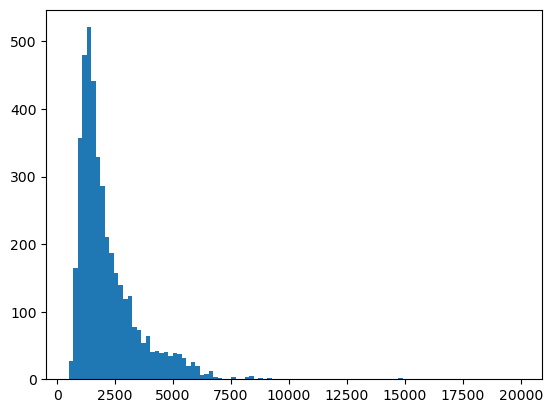

In [ ]:
plt.hist(df_goes_nans['nans_sum'][df_goes_nans['nans_sum'] <20000], bins=100);

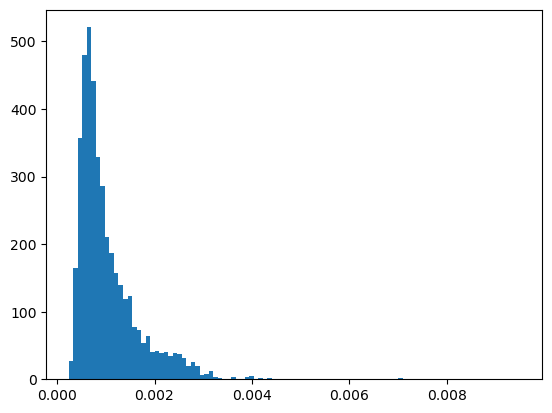

In [295]:
plt.hist(df_goes_nans['nans_perc'][df_goes_nans['nans_sum'] <20000], bins=100);

In [296]:
df_goes_nans.to_csv('./raw-summary-files/goes_2020_hourly_nans.csv', index=False)
df_goes_nans.head()

,datetime,wavelengths,nans,nans_norm,nans_sum,nans_perc,nans_std
0,20200101010021,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[2845420, 2852266, 2852657, 2852384, 2852841, ...","[437, 45, 515, 256, 685, 181, 221, 234, 107, 1...",4248,0.002023,1696.676281
1,20200101040021,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[2845158, 2852225, 2852324, 2852213, 2852670, ...","[175, 4, 182, 85, 514, 108, 159, 171, 90, 62, ...",3385,0.001612,1757.340067
2,20200101080021,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[2845052, 2852268, 2852219, 2852174, 2852508, ...","[69, 47, 77, 46, 352, 53, 149, 149, 86, 42, 84...",1201,0.000572,1736.001148
3,20200101110021,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[2845047, 2852278, 2852214, 2852174, 2852240, ...","[64, 57, 72, 46, 84, 57, 149, 149, 43, 150, 42...",1076,0.000512,1733.566770
4,20200101120021,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[2845047, 2852270, 2852218, 2852173, 2852254, ...","[64, 49, 76, 45, 98, 51, 149, 149, 150, 150, 4...",1190,0.000567,1735.464805


In [19]:
len(df_goes_nans), len(df_goes_nans[df_goes_nans['nans_sum'] > 0])

(4344, 4344)

In [20]:
files_with_nans = df_goes_nans[df_goes_nans['nans_sum'] > 0]

In [21]:
np.nanmin(files_with_nans['nans_sum']), np.nanmax(files_with_nans['nans_sum'])

(np.int64(506), np.int64(27516938))

In [301]:
files_with_nans.loc[files_with_nans['nans_sum'].idxmin()]

datetime                                          20200815220020
wavelengths    [0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...
nans           [2845038, 2852232, 2852211, 2852173, 2852157, ...
nans_norm      [55, 11, 69, 45, 1, 43, 42, 42, 86, 42, 42, 27...
nans_sum                                                     506
nans_perc                                               0.000241
nans_std                                             1726.308904
Name: 2722, dtype: object

In [302]:
files_with_nans.loc[files_with_nans['nans_sum'].idxmax()]

datetime                                          20200408050025
wavelengths    [0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...
nans           [4549089, 4593868, 4532755, 4502948, 4611770, ...
nans_norm      [1704106, 1741647, 1680613, 1650820, 1759614, ...
nans_sum                                                27516938
nans_perc                                              13.102177
nans_std                                            41972.063186
Name: 1147, dtype: object

In [35]:
files_with_many_nans = files_with_nans[files_with_nans['nans_perc'] > 0.003]
# files_with_many_nans = files_with_many_nans[files_with_many_nans['nans_perc'] < 0.003]
# print(len(files_with_many_nans))
# print(files_with_many_nans.iloc[files_with_many_nans['nans_perc'].idxmax()])
files_with_many_nans

,datetime,wavelengths,nans,nans_norm,nans_sum,nans_perc,nans_std
8,20200101190021,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[2845330, 2852455, 2852487, 2852330, 2852638, ...","[347, 234, 345, 202, 482, 162, 34, 61, 193, 93...",10937,0.005208,2069.830937
34,20200103180021,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[2845223, 2852463, 2852339, 2852273, 2852535, ...","[240, 242, 197, 145, 379, 161, 170, 195, 170, ...",53627,0.025534,12502.289010
41,20200104020021,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[2845333, 2855603, 2852562, 2852355, 2852711, ...","[350, 3382, 420, 227, 555, 143, 195, 226, 72, ...",6843,0.003258,1925.046136
50,20200104180021,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[2845258, 2852674, 2865398, 2852288, 2852580, ...","[275, 453, 13256, 160, 424, 159, 51682, 47, 16...",67779,0.032273,12903.871730
54,20200104220021,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[2845563, 2852586, 2852806, 2852348, 2855416, ...","[580, 365, 664, 220, 3260, 232, 260, 232, 231,...",8188,0.003899,1865.131579
...,...,...,...,...,...,...,...
4155,20201215150022,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[2845110, 5121551, 2852273, 2852188, 2852357, ...","[127, 2269330, 131, 60, 201, 106, 16, 164, 159...",2270987,1.081329,549430.058923
4157,20201215190022,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[2970723, 2852456, 2977793, 2852193, 2954651, ...","[125740, 235, 125651, 65, 102495, 127203, 156,...",1498792,0.713649,54081.301204
4205,20201220050021,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[2952878, 2949529, 2971745, 2984232, 2934481, ...","[107895, 97308, 119603, 132104, 82325, 68006, ...",1613275,0.768160,20096.729933
4259,20201224200021,"[0.47, 0.64, 0.87, 1.38, 1.61, 2.25, 3.89, 6.1...","[2852836, 6622315, 2863191, 2852239, 2857566, ...","[7853, 3770094, 11049, 111, 5410, 4895, 151, 1...",3804118,1.811329,912187.085908


In [42]:
# Remove csv file
from tqdm import tqdm

path = '/mnt/disks/eo-data/goes'
df_filter = files_with_many_nans.set_index('datetime')
df_norm = pd.read_csv('goes_2020_hourly_subset.csv')
df_norm = df_norm.set_index('datetime')

# remove all indexes in df_filter from df_norm
df_norm = df_norm[~df_norm.index.isin(df_filter.index)]
df_norm.reset_index(inplace=True)

In [44]:
len(df_norm)

4186

In [45]:
df_norm.to_csv('goes_2020_hourly_subset (after filtering).csv', index=False)

Conclusion 1: There is no standard minimum across spectral channels. I am therefore normalizing everything by the individual minima per channel. This means, however, that pretty much every file has a nan_count > 0, making it harder to filter.

Conclusion 2: There are some files with complete (e.g. 20200302050017, 20200408050025) or half channels missing (e.g. 20201008000018).

Conclusion 3: After manual filtering and inspecting, I found that a nan_perc cut-off of smaller than 0.003% seems to avoid any obvious artifacts. The nan_std is not such useful metric for the GOES subset, since the spread is much larger than MSG (likley due to lack of a consistent minimum).

##### Visualize files with nans

In [76]:
path = '/mnt/disks/eo-data/goes'
file = '20200206010010_goes16.nc'

ds = xr.open_dataset(os.path.join(path, file))

c, h, w = ds.Rad.shape

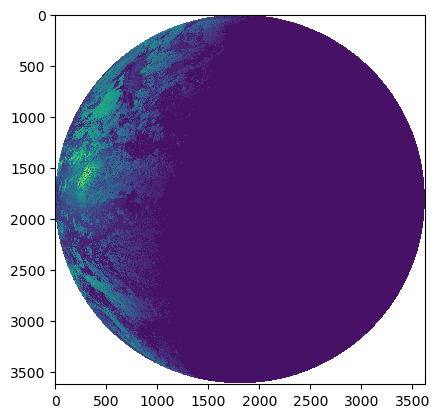

In [50]:
n = 5
# plot areas with nans
# plt.imshow(np.isnan(ds.Rad.values[n]), cmap='Reds', interpolation='none')
plt.imshow(ds.Rad.values[n], interpolation='none')

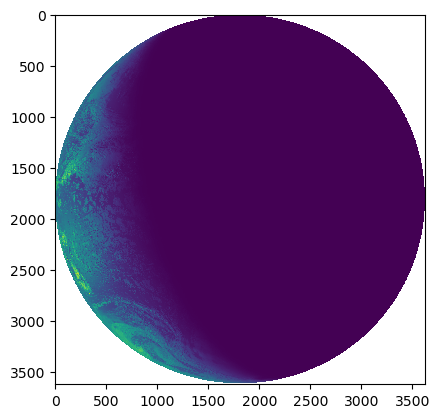

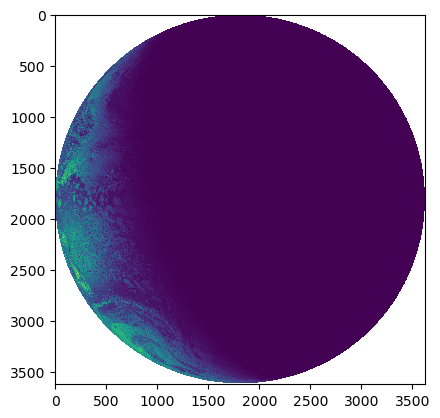

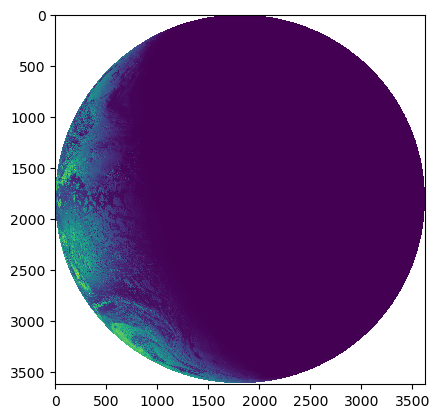

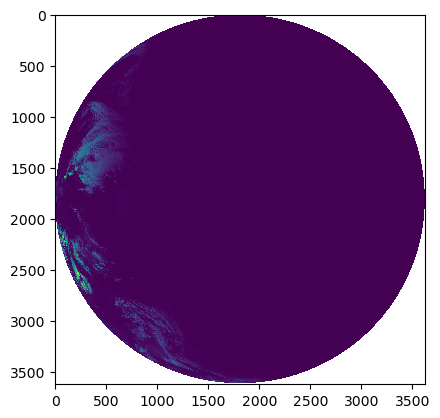

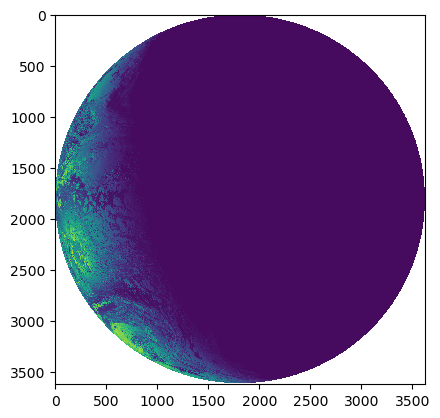

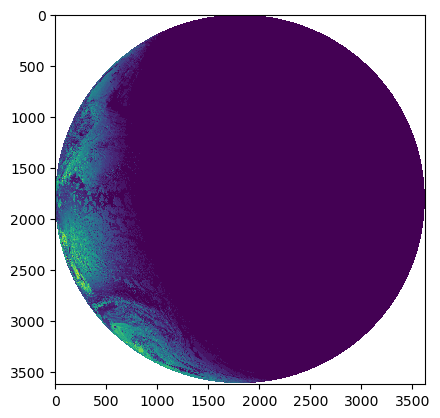

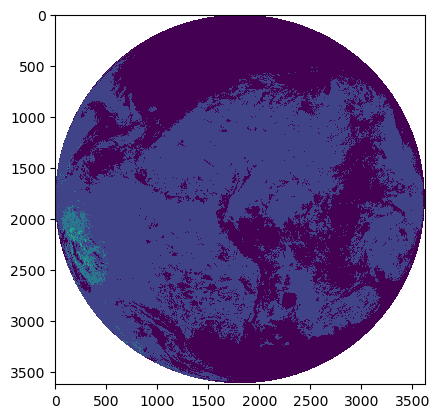

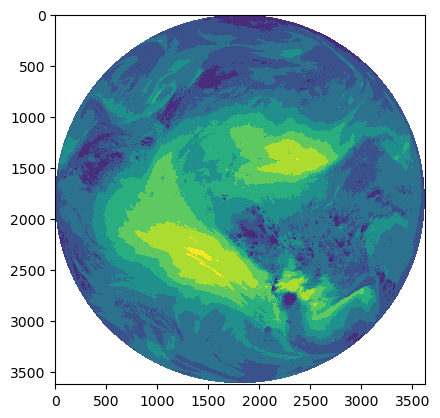

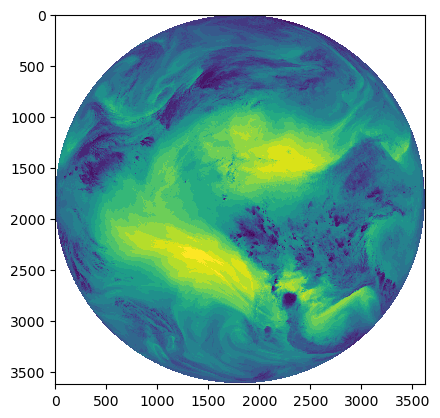

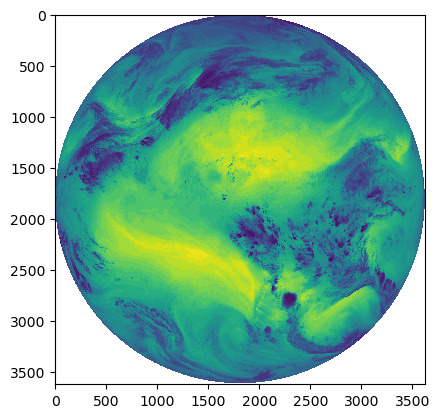

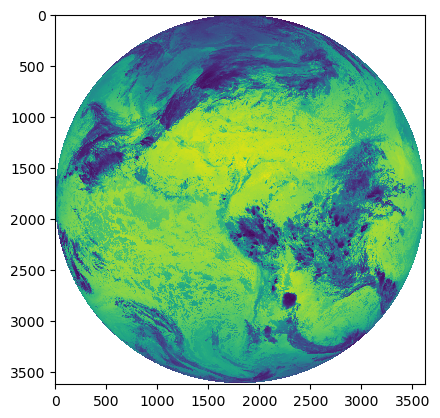

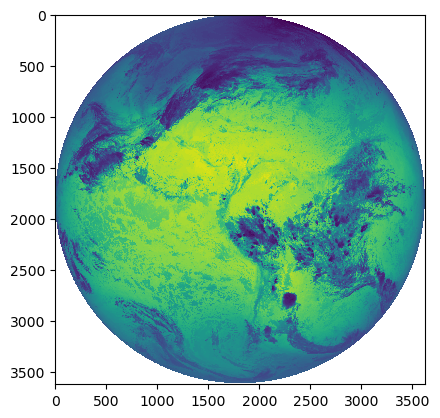

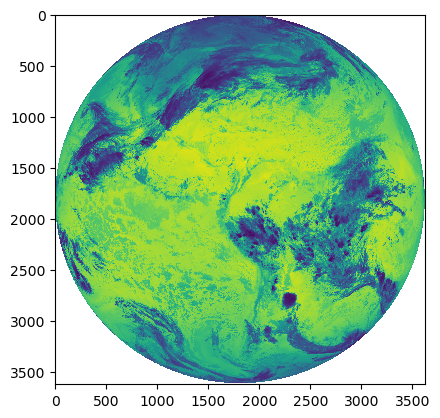

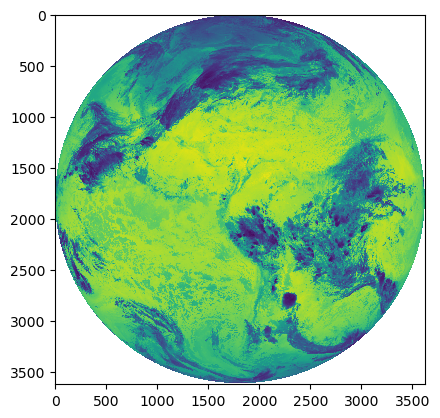

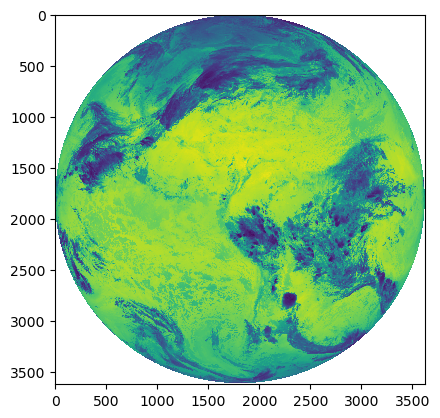

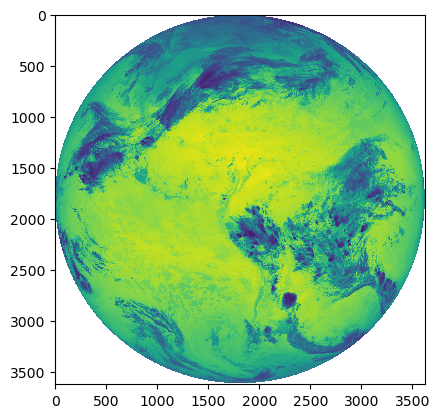

In [77]:
for n in range(0, 16):
    plt.imshow(ds.Rad.values[n], interpolation='none')
    plt.show()